<a href="https://colab.research.google.com/github/WittmannF/udemy-deep-learning-cnns/blob/main/00.aquecimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aquecimento - Treinando um Classificador de Raças de Cachorros
#### Referências utilizadas:
- https://github.com/fastai/imagenette
- https://github.com/WittmannF/deepfeatx
- https://www.cyberciti.biz/faq/unpack-tgz-linux-command-line/
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Baixar e descompactar base de dados

In [1]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz

--2021-10-11 13:13:41--  https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.168.200
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.168.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1343715595 (1.3G) [application/x-tar]
Saving to: ‘imagewoof2.tgz’

imagewoof2.tgz      100%[===================>]   1.25G  38.1MB/s    in 36s     

2021-10-11 13:14:17 (35.8 MB/s) - ‘imagewoof2.tgz’ saved [1343715595/1343715595]



In [2]:
!tar zxvf imagewoof2.tgz

Streaming output truncated to the last 5000 lines.
imagewoof2/train/n02115641/n02115641_9529.JPEG
imagewoof2/train/n02115641/n02115641_12039.JPEG
imagewoof2/train/n02115641/n02115641_8768.JPEG
imagewoof2/train/n02115641/n02115641_7188.JPEG
imagewoof2/train/n02115641/n02115641_6633.JPEG
imagewoof2/train/n02115641/n02115641_25018.JPEG
imagewoof2/train/n02115641/n02115641_10706.JPEG
imagewoof2/train/n02115641/n02115641_11814.JPEG
imagewoof2/train/n02115641/n02115641_51135.JPEG
imagewoof2/train/n02115641/n02115641_7409.JPEG
imagewoof2/train/n02115641/n02115641_29257.JPEG
imagewoof2/train/n02115641/n02115641_17997.JPEG
imagewoof2/train/n02115641/n02115641_6473.JPEG
imagewoof2/train/n02115641/n02115641_2963.JPEG
imagewoof2/train/n02115641/n02115641_52488.JPEG
imagewoof2/train/n02115641/n02115641_6536.JPEG
imagewoof2/train/n02115641/n02115641_6166.JPEG
imagewoof2/train/n02115641/n02115641_21519.JPEG
imagewoof2/train/n02115641/n02115641_504.JPEG
imagewoof2/train/n02115641/n02115641_14084.JPEG


# Instalação da Biblioteca deepfeatx

In [3]:
!pip install deepfeatx

# Extrair características a partir das imagens

In [4]:
from deepfeatx.image import ImageFeatureExtractor

In [5]:
fe = ImageFeatureExtractor('efficientnetb4')

71696384/71686520 [==============================] - 1s 0us/step


In [7]:
train = fe.extract_features_from_directory('/content/imagewoof2/train',
                                   classes_as_folders=True,
                                   export_class_names=True)

Found 9025 images belonging to 10 classes.
283/283 [==============================] - 65s 167ms/step


In [8]:
train.head()

,filepaths,classes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791
0,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,0.160222,-0.073759,-0.004479,0.306160,0.060288,1.594283,-0.131422,-0.125402,0.006257,0.364015,-0.167588,-0.047081,-0.058396,-0.219359,-0.108947,0.043888,-0.110909,-0.173395,-0.139386,-0.213779,-0.189480,0.026114,-0.166684,-0.245315,0.160500,0.192752,-0.152120,-0.189679,-0.156952,0.083793,-0.140209,-0.044050,-0.155076,-0.213881,-0.222050,0.052453,-0.238232,-0.157500,...,-0.040644,0.046563,-0.180080,0.046462,-0.144029,-0.060642,0.030381,-0.006028,0.283477,-0.095805,0.024653,0.166366,-0.157830,-0.161328,-0.157649,0.472608,-0.163294,-0.106237,-0.164226,0.483045,-0.167371,0.028264,-0.102641,-0.171684,-0.199711,0.255884,-0.017207,-0.083302,0.002763,0.248189,0.119667,0.256791,-0.206441,-0.223621,0.475834,-0.026286,-0.141821,0.424183,-0.182108,-0.233985
1,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,0.238553,-0.014516,-0.181441,-0.148636,0.093069,0.516714,-0.165618,-0.186468,-0.163473,-0.062609,-0.118075,-0.185998,-0.151849,-0.159056,-0.185506,0.439584,-0.070859,-0.196350,-0.157948,-0.074049,-0.149479,-0.183269,0.143548,-0.180105,0.482244,-0.224488,-0.211590,-0.228267,-0.158672,-0.115591,-0.011724,-0.169810,-0.123052,-0.226061,-0.208213,-0.118551,-0.222604,-0.205050,...,-0.143754,-0.227157,-0.130082,0.154157,-0.182598,0.051464,-0.226393,-0.076645,0.634285,-0.066158,-0.159403,-0.045169,-0.212448,-0.102359,-0.201036,0.156428,-0.131905,0.116964,-0.051344,-0.090609,-0.131191,-0.203623,-0.216315,-0.206670,-0.191849,-0.079074,0.148963,-0.157515,-0.042032,0.027788,0.587014,-0.116674,-0.194710,-0.244617,-0.206477,0.067964,-0.188228,-0.205185,-0.171030,-0.217922
2,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,-0.050997,-0.025804,-0.130996,0.220502,-0.240279,0.906636,-0.190002,-0.130339,-0.167608,0.109635,-0.188044,-0.074126,-0.041319,-0.198489,0.072462,-0.109586,0.013058,-0.098616,-0.093411,-0.185577,-0.187553,-0.147054,0.120229,-0.201126,1.241066,-0.184303,-0.172239,-0.201832,-0.197919,-0.161072,-0.244739,-0.164613,0.054457,-0.138392,-0.187974,0.001646,-0.050854,-0.173664,...,-0.021438,-0.151050,0.264928,-0.181149,-0.131852,-0.093001,0.436795,-0.103529,0.961700,-0.029856,-0.005512,-0.053731,0.211411,-0.008711,-0.089698,-0.194826,-0.152701,-0.103218,0.035972,-0.146942,-0.127415,-0.132345,-0.158100,-0.128649,-0.076480,0.364771,-0.178595,-0.175238,-0.119225,0.292172,0.057298,-0.058764,-0.196126,-0.110143,-0.211183,0.025580,-0.166719,-0.108875,0.206935,-0.183945
3,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,-0.091665,0.086189,-0.166830,1.023332,-0.141906,0.003402,-0.196479,-0.156148,-0.060961,-0.220407,-0.169505,0.230874,-0.202983,-0.196701,-0.121557,-0.070128,-0.052148,-0.172151,-0.218496,-0.248763,-0.173174,-0.182047,-0.098791,-0.179319,0.418651,-0.215329,-0.169036,-0.156293,-0.203941,-0.050581,0.154491,-0.095685,-0.183602,-0.206093,-0.196996,0.008740,-0.181312,-0.159269,...,-0.142002,-0.116764,-0.229594,-0.177798,0.291894,0.214583,0.072279,0.025914,0.400585,-0.074065,0.772246,-0.080609,-0.107473,-0.138381,0.418143,0.328196,0.079978,-0.198891,0.368030,0.316647,-0.153725,-0.151485,-0.201413,-0.246633,-0.198608,-0.124748,-0.203042,0.053277,-0.112817,0.046726,0.267474,-0.221208,-0.173221,-0.169563,0.040891,0.030565,-0.204101,-0.173779,-0.248565,1.012479
4,/content/imagewoof2/train/n02086240/ILSVRC2012...,n02086240,1.047808,-0.229964,-0.146238,0.576511,0.422958,0.662097,-0.096529,-0.188471,-0.192380,-0.115515,-0.040682,-0.115734,0.021521,-0.155949,-0.087176,0.155481,0.057937,0.220635,-0.134899,-0.149578,-0.153660,-0.185443,0.620120,-0.204373,0.688140,-0.215654,-0.053712,0.008832,-0.184877,-0.090951,0.223195,0.026743,0.0442

In [9]:
test = fe.extract_features_from_directory('/content/imagewoof2/val',
                                   classes_as_folders=True,
                                   export_class_names=True)

Found 3929 images belonging to 10 classes.
123/123 [==============================] - 20s 164ms/step


In [10]:
test.head()

,filepaths,classes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791
0,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,-0.009233,-0.160616,-0.167685,0.280745,-0.188732,0.566831,-0.065141,-0.119852,-0.166285,-0.003343,-0.188249,0.130254,-0.093094,-0.151455,-0.152233,-0.042410,-0.006769,-0.159254,-0.162162,-0.122893,0.001818,-0.114379,0.190733,-0.176068,0.710489,-0.165784,-0.180695,-0.183286,-0.130977,-0.144889,-0.185600,-0.191083,-0.161649,-0.164042,-0.121742,-0.145460,-0.156082,-0.097648,...,-0.146003,-0.200651,-0.083399,-0.049086,-0.131364,0.105622,-0.201405,0.016985,0.363362,-0.045281,0.217381,0.265443,-0.182369,-0.043616,-0.158759,0.515347,-0.117492,-0.073958,-0.095081,0.033484,-0.057887,-0.111909,-0.094524,-0.252689,-0.193359,-0.066378,-0.129295,-0.060577,-0.112288,0.388130,0.134980,-0.053920,-0.126150,-0.214256,-0.186610,0.175941,-0.161341,-0.128975,-0.199732,-0.215255
1,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,-0.005577,-0.084954,-0.014809,0.168355,-0.099480,0.198303,-0.158655,-0.105122,-0.103611,-0.087226,-0.155774,-0.159337,-0.131010,-0.172787,-0.116997,-0.194648,-0.087245,0.040317,-0.193933,-0.104685,-0.129785,-0.158378,-0.042765,-0.173289,0.680238,-0.171046,-0.222587,-0.126611,-0.193082,-0.132159,-0.169095,-0.145442,0.046449,-0.124855,-0.123896,0.151048,-0.143166,-0.090131,...,-0.170764,-0.133047,-0.097229,0.101373,-0.050871,0.406838,-0.121102,-0.079117,0.757101,-0.074046,-0.171761,-0.126643,0.229596,-0.031690,-0.117691,0.054768,0.216394,-0.118164,-0.179572,-0.066854,-0.112716,-0.190470,-0.072515,-0.217092,-0.150463,-0.220796,-0.182337,-0.164737,0.026821,0.594993,0.206147,-0.168604,-0.163210,-0.244207,0.098030,0.088352,-0.168157,-0.139710,-0.186559,-0.125745
2,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,0.000748,-0.127492,-0.140704,0.724191,-0.068861,0.475013,-0.118092,-0.114789,-0.181247,-0.090907,-0.158445,-0.188492,-0.088818,-0.192117,-0.141606,0.097144,0.036952,0.100673,-0.182052,-0.086431,-0.063910,-0.153826,0.048243,-0.174242,1.224924,-0.158047,-0.240425,-0.193212,-0.196741,-0.145489,-0.196199,-0.194014,0.141749,-0.121125,-0.104000,0.603951,-0.168886,-0.174920,...,-0.116360,-0.170097,-0.081915,-0.130748,-0.037258,0.641813,-0.196776,-0.019836,0.552385,-0.043108,-0.059116,0.054075,0.191801,-0.017483,-0.161233,0.448610,-0.020930,-0.021660,-0.166120,0.547954,-0.118618,-0.154891,-0.150807,-0.208694,-0.178984,-0.208647,-0.120037,-0.145780,-0.065354,0.487675,0.694395,-0.167695,-0.152716,-0.209979,-0.111958,0.014780,-0.190306,-0.166227,-0.137799,-0.217748
3,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,0.466852,-0.067075,-0.170420,0.090244,0.105937,-0.159070,-0.246457,-0.130925,0.417310,-0.198034,-0.161802,-0.174369,0.258632,-0.183647,-0.087967,0.179090,-0.127181,0.011017,0.758705,0.575502,-0.199141,0.055044,0.177528,-0.109954,-0.082119,0.059668,0.227632,-0.180939,-0.147178,-0.197503,-0.153934,0.249570,0.166084,-0.207325,-0.168722,0.284102,-0.205313,0.251989,...,-0.185989,0.864299,-0.205429,-0.103962,0.032880,-0.025859,-0.160746,-0.129571,-0.055389,-0.183540,-0.196554,0.010381,0.622893,-0.159598,-0.030022,-0.098625,-0.170461,-0.011779,-0.119908,-0.217615,-0.149917,0.481810,-0.116448,0.061475,-0.046426,-0.193167,1.060598,-0.147073,-0.189685,0.023811,0.358270,-0.155266,-0.145710,-0.183279,0.460680,0.193317,-0.197740,-0.125009,-0.251945,-0.079474
4,/content/imagewoof2/val/n02086240/ILSVRC2012_v...,n02086240,0.245888,-0.045078,-0.114635,-0.121710,1.030221,0.178445,-0.142323,-0.146979,0.007909,-0.110126,-0.166036,-0.022899,-0.018713,-0.177803,-0.115605,0.220498,-0.146641,0.204297,0.048816,0.326198,-0.184434,0.466293,0.996520,-0.132243,1.083425,0.251975,-0.056349,0.151208,-0.041327,-0.144737,-0.202129,-0.088756,

# Treinamento do Modelo

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
X_train = train.drop(['filepaths', 'classes'], axis=1)
X_test = test.drop(['filepaths', 'classes'], axis=1)

y_train = train['classes']
y_test = test['classes']


lr = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Métricas

In [16]:
# acurácia
lr.score(X_test, y_test)

0.9541868159837109

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[397,   0,   1,   0,   4,   1,   2,   3,   1,   0],
       [  0, 396,   2,   1,   3,   2,   3,   0,   0,   1],
       [  2,   4, 384,  23,   1,   1,   1,   0,   1,   1],
       [  2,   4,  20, 193,   1,   0,   1,   0,   0,   3],
       [  3,   1,   0,   1, 386,   5,   0,   2,   2,   1],
       [  2,   1,   0,   3,  11, 383,   1,   3,   0,   3],
       [  2,   2,   1,   1,   3,   1, 387,   0,   2,   2],
       [  6,   0,   0,   0,   1,   0,   1, 410,   2,   2],
       [  1,   0,   0,   0,   0,   0,   1,   1, 425,   1],
       [  0,   6,   2,   3,   3,   1,   6,   0,   1, 388]])

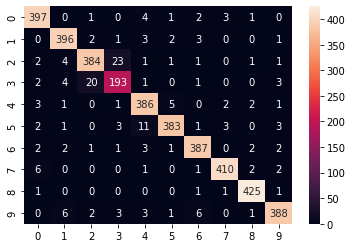

In [21]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g')